In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

# <font color = purple> Sentiment Analysis of Jigsaw Academy Google reviews
<font color = purple>   AIM >>  Here our aim is to do sentiment analysis on Jigsaw Academy reviews given by students and to see what approch we can suggest client to further improve the performace of the academy.

In [20]:
# Read in the data
df = pd.read_csv(r'/content/Jigsawreviews.csv')
df.head()

,author_title,review_text,review_rating
0,Mintu Jakhar,I usually check reviews before making the deci...,4
1,Shreyasi Mahurkar,I was enrolled in Integrated Program in Busine...,5
2,Revathy P,"I did a Data Analytics program from Jigsaw, re...",5
3,Shaik Ahmed,I found the Business Analytics course very int...,5
4,Kartik Jain,"Hi All,\n\nI've been part of the IPBA batch (B...",5


In [21]:
print('shape of data', df.shape)

shape of data (500, 3)


In [22]:
# Checking for null values
df.isnull().sum()

author_title     0
review_text      0
review_rating    0
dtype: int64

### <font color = brown > EDA

Frequency of ratings


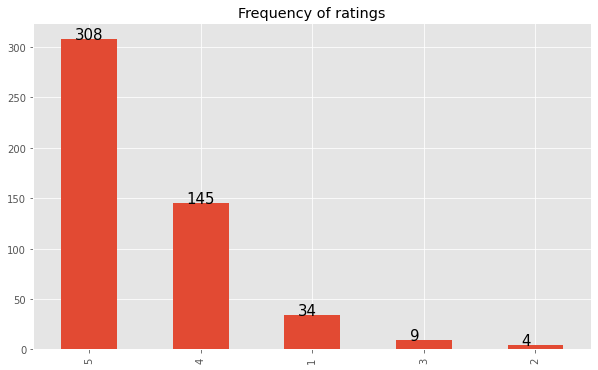

In [23]:
print('Frequency of ratings')
plt.figure(figsize = (21, 6))
plots = df['review_rating'].value_counts().plot(kind = 'bar');
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                  (bar.get_x() + bar.get_width()/4, bar.get_height()),
                   size = 15)
plt.title('Frequency of ratings');

<font color = olive>**Observation**: ***From here we can see that the people giving 5 rating is very high. And the people giving rating as 2 is the least. So we can see that the most of the people are satisfied with the academy but still some are not happy with the institute.***

### <font color = brown > Basic NLTK

In [24]:
example = df['review_text'][12]
print(example)

Took Full stack data science course: I had a great experience with Jigsaw Academy as there way of teaching and making it interactive for online classes is really nice. Got to learn alot from the course and the trainers were very soft spoken and knowledgeable.


In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# TOkenizing the 
tokens = nltk.word_tokenize(example)
tokens[:10]

['Took', 'Full', 'stack', 'data', 'science', 'course', ':', 'I', 'had', 'a']

In [27]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [28]:
print('Looking at parts of speech of tokenised words')
tagged = nltk.pos_tag(tokens)
tagged[:11]

Looking at parts of speech of tokenised words


[('Took', 'NNP'),
 ('Full', 'NNP'),
 ('stack', 'NN'),
 ('data', 'NNS'),
 ('science', 'NN'),
 ('course', 'NN'),
 (':', ':'),
 ('I', 'PRP'),
 ('had', 'VBD'),
 ('a', 'DT'),
 ('great', 'JJ')]

In [34]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [35]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (PERSON Took/NNP)
  (ORGANIZATION Full/NNP)
  stack/NN
  data/NNS
  science/NN
  course/NN
  :/:
  I/PRP
  had/VBD
  a/DT
  great/JJ
  experience/NN
  with/IN
  (PERSON Jigsaw/NNP Academy/NNP)
  as/IN
  there/EX
  way/NN
  of/IN
  teaching/NN
  and/CC
  making/VBG
  it/PRP
  interactive/JJ
  for/IN
  online/JJ
  classes/NNS
  is/VBZ
  really/RB
  nice/JJ
  ./.
  (PERSON Got/NNP)
  to/TO
  learn/VB
  alot/NN
  from/IN
  the/DT
  course/NN
  and/CC
  the/DT
  trainers/NNS
  were/VBD
  very/RB
  soft/JJ
  spoken/NNS
  and/CC
  knowledgeable/JJ
  ./.)


<font color = black > Basic NLTK   We will use NLTK's to get neg/ neutral/ positive scores form the text.
- <font color = black > **This used "bag of words" approach:**
    1. Stop words are removed 
    2. Each word is scored and combined to a total score.

<font color = olive > Note: It is not the robust approach we shall later apply another approach.

In [39]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [40]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [41]:
sia = SentimentIntensityAnalyzer()

In [42]:
# Lets see an example of how it works.
sia.polarity_scores('I am very happy.')

{'compound': 0.6115, 'neg': 0.0, 'neu': 0.334, 'pos': 0.666}

In [43]:
# Lets take a negative text.
sia.polarity_scores('This is worst of all.')

{'compound': -0.6249, 'neg': 0.506, 'neu': 0.494, 'pos': 0.0}

<font color = brown>**Lets apply it to our actual review from the text data.**

In [44]:
# Lets apply this to our actual review and see the result
print(example)
sia.polarity_scores(example)

Took Full stack data science course: I had a great experience with Jigsaw Academy as there way of teaching and making it interactive for online classes is really nice. Got to learn alot from the course and the trainers were very soft spoken and knowledgeable.


{'compound': 0.8016, 'neg': 0.0, 'neu': 0.851, 'pos': 0.149}

<font color = olive>**Observation**: ***So we can see that the compund score of the review is 0.8 which is a positive sentiment. And by reading the review also we can see that the student is accually happy from the academy.***

### <font color = maroon > Applying it to all the reviews.

In [45]:
# Applying this to all the riveuws
df1 = df.copy()

df1['VADER Polarity'] = df1['review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df1.head()

,author_title,review_text,review_rating,VADER Polarity
0,Mintu Jakhar,I usually check reviews before making the deci...,4,0.9871
1,Shreyasi Mahurkar,I was enrolled in Integrated Program in Busine...,5,0.9851
2,Revathy P,"I did a Data Analytics program from Jigsaw, re...",5,0.9272
3,Shaik Ahmed,I found the Business Analytics course very int...,5,0.9500
4,Kartik Jain,"Hi All,\n\nI've been part of the IPBA batch (B...",5,0.9819


In [46]:
df1.tail()

,author_title,review_text,review_rating,VADER Polarity
495,Anshuman Sharma,The overall experience was good and satisfacto...,4,0.8402
496,Tunku Basu Majumdar,I would like to know about the process of how ...,3,0.5719
497,Rama Krishna,Good place for the beginners in data science. ...,4,0.6808
498,Bhamidipati Lakshminarayana,Not good for experienced people. Placement ass...,2,-0.3412
499,Mukesh Gupta,"""Excellent Experience and service."" It has bee...",5,0.8126


<font color = olive>**Observation**: ***So we can see that results that we are getting with the Cader polarity is good and accurate.***

<font color = brown>***Lets visualize how the compound score is with respect to ratings.***

Text(0.5, 1.0, 'Vader polarity score vs rating')

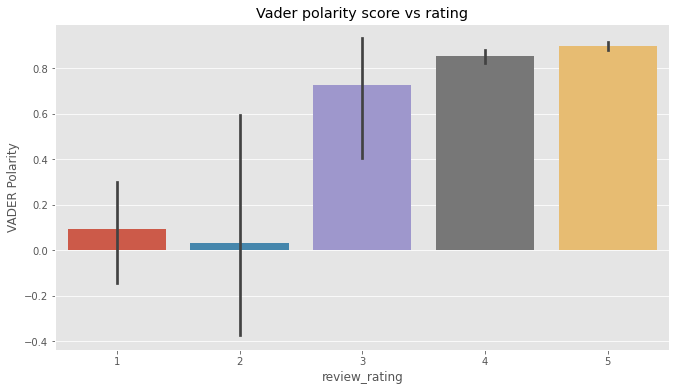

In [47]:
plt.figure(figsize = (11, 6))
ax = sns.barplot(data = df1, x = df1['review_rating'], y = df1['VADER Polarity'])
plt.title('Vader polarity score vs rating')

<font color = olive>**Observation**: *So we can see for rating less than three the VADER Polarity score is also very less. As these are negative review. So we can say that VAder is performaing quite good. Now lets see the evaluation of model.*

### <font color = maroon > Evaluation of Vader

In [48]:
## Substituting Polarity score of greater than 0.4 with 1 which will represnt it is positive score.
# And substiting Polarity score less than 0.4 with 0 with will represnts negative score.

pred = np.where(df1['VADER Polarity']> 0.4, 1, 0)
df1['predicted sentiment'] = pred

In [49]:
# Substituting rating above 2 as 1 which will repreenst positive review.
# Substituting rating below 3 as 0 which will represnts negative review.
actual = np.where(df1['review_rating']>2, 1, 0)
df1['actual sentiment'] = actual

In [50]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66        38
           1       0.97      0.98      0.97       462

    accuracy                           0.95       500
   macro avg       0.83      0.80      0.82       500
weighted avg       0.95      0.95      0.95       500



In [51]:
df1[df1['review_rating']< 3]

,author_title,review_text,review_rating,VADER Polarity,predicted sentiment,actual sentiment
28,Karthik Sriram,Big Looters . Poor quality training. I joined ...,1,0.6714,1,0
63,GUNASEKARAN Kuppayee Sengodan,First time enrolled into the Course. With the ...,2,0.9026,1,0
72,sathvik kullolli,Surely not worth the money.Go for some other i...,1,0.9048,1,0
82,Ketan Chaudhari,Bad experience with online training. After som...,1,0.8953,1,0
138,Snigdha Shukla,Course content of good..but as far as placemen...,2,-0.4028,0,0
147,Balakrishna G,"I don't find really worth doing it in Jigsaw, ...",1,0.1636,0,0
211,Priya P,My recent experience with Jigsaw has me comple...,1,-0.6724,0,0
268,Chirag Suthar,"Very poor service,along with me and my friends...",1,0.6429,1,0
289,saikumar rachamalla,"Hi, please give your sincere feedback regardin...",1,0.9556,1,0
291,Ravindra Singh Suri,"I am a student of Jigsaw, Jig15051 is my ID.\...",1,0.9473,1,0


In [88]:
example2 = df1[df1['review_rating']< 3].iloc[7]['review_text']
example2

'Very poor service,along with me and my friends registered this course of more then 50k INR but not worth to join specially who want to know the in and out of big data and data science. There are other good training institute like Coursera, simplylearn would be better then this program style. I`d not recommend this course for fresher who simple need more package to switch their career to analytics, secondly its not worth joining for working professional who are expecting to freeze their course in  between as Jigsaw only gives self learning video once you are out of continuous session series out from your assign batch. The video access is not a life time, you have to pay for the videos once your course duration is expire, Be aware!'

In [89]:
sia.polarity_scores(example2)['compound']

0.6429

<font color = olive>**Observation**: 
- So from the dataframe we can see that the predictions are not that accurate. As the VADER take each word individually and then score each word saperately and then compound all the scores and gives the overall compound score. 
- As a result it gets confused with the long reviews. 
- So basically VADER cannot understand the context of the text hence, scoring is not that accurate. Ultimately, the classifaction of negative and positive review is poor.
- Therefore for the example2 in the above cell even though the score review is actually negative we are getting the compound score of 0.62 which represents positive score.
- So we shall use some other powerful model which can understand context of the text.    

### <font color = maroon > Roberta Pretrained model (Deep Learning Model Transfer Learning)
- 

In [54]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 52.0 MB/s 
     |████████████████████████████████| 6.6 MB 54.6 MB/s 
     |████████████████████████████████| 101 kB 12.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [90]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [91]:
# Loading pretrained model
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [92]:
print('VADER score')
print(example2)
sia.polarity_scores(example2)['compound']

VADER score
Very poor service,along with me and my friends registered this course of more then 50k INR but not worth to join specially who want to know the in and out of big data and data science. There are other good training institute like Coursera, simplylearn would be better then this program style. I`d not recommend this course for fresher who simple need more package to switch their career to analytics, secondly its not worth joining for working professional who are expecting to freeze their course in  between as Jigsaw only gives self learning video once you are out of continuous session series out from your assign batch. The video access is not a life time, you have to pay for the videos once your course duration is expire, Be aware!


0.6429

### <font color = maroon > Lets see what is the score for teh same review by roberta model.

In [140]:
# Run roberta model
encoded_text = tokenizer(t, return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores

array([0.00152433, 0.01757272, 0.980903  ], dtype=float32)

In [152]:
import operator
def func(ex):
    encoded_text = tokenizer(ex, return_tensors = 'pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores
    scores_dict = {
            'roberta_neg': scores[0],
            'roberta_neu': scores[1],
            'roberts_pos': scores[2]
        }
    val = max(scores_dict.items(), key = operator.itemgetter(1))[0]   
    return val

<font color = olive>**Observation**: So this pretrained model is performing better than the VADER. However, any model has limitations. Same is with Roberta model even though it is able to understand the context it cannot be fullproof. For some reviews especially for the long reviews there might be chunks of positive, neutral, or negative reviews. So there any model cannot perform good. But for the medium review or small review or where the entire revive is same sentiment this model can perform better than VADER.

In [106]:
df2 = df1.copy()

In [129]:
t = df2['review_text'][:5][1]

In [172]:
out = []
for n, text in enumerate(df2['review_text']):
    try:
        out.append(func(text))
        
    except RuntimeError:
        out.append(np.nan)
        print('it did not worked for text at position', n)

it did not worked for text at position 17
it did not worked for text at position 38
it did not worked for text at position 67
it did not worked for text at position 135
it did not worked for text at position 253
it did not worked for text at position 256


In [179]:
out = pd.Series(out)

In [182]:
# replacing positive and neutral with 1 and negative with 0
roberta_pred = out.replace({'roberts_pos': 1, 'roberta_neu': 1, 'roberta_neg': 0})

In [184]:
df2['Roberta_prediction'] = roberta_pred

In [185]:
df2.head()

,author_title,review_text,review_rating,VADER Polarity,predicted sentiment,actual sentiment,Roberta_prediction
0,Mintu Jakhar,I usually check reviews before making the deci...,4,0.9871,1,1,1.0
1,Shreyasi Mahurkar,I was enrolled in Integrated Program in Busine...,5,0.9851,1,1,1.0
2,Revathy P,"I did a Data Analytics program from Jigsaw, re...",5,0.9272,1,1,1.0
3,Shaik Ahmed,I found the Business Analytics course very int...,5,0.9500,1,1,1.0
4,Kartik Jain,"Hi All,\n\nI've been part of the IPBA batch (B...",5,0.9819,1,1,1.0


### <font color = maroon > Evaluation of Roberta

In [203]:
# Creating mew DataFrame without null values
df3 = df2.dropna(axis = 0)

In [205]:
df3.isnull().sum()

author_title           0
review_text            0
review_rating          0
VADER Polarity         0
predicted sentiment    0
actual sentiment       0
Roberta_prediction     0
dtype: int64

In [206]:
print(classification_report(df3['actual sentiment'], df3['Roberta_prediction']))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        38
           1       0.98      0.99      0.99       456

    accuracy                           0.98       494
   macro avg       0.94      0.90      0.92       494
weighted avg       0.98      0.98      0.98       494



<font color = olive>**Observation**: 
- Now we can see that Roberta model is able to capture and classify negative sentiments and positive sentiments more precisely.
- Here the overall accuracy is 98% which is more than VADER model.
- Also it is able to classify both positive and negative review better than the VADER model.
- So we can use this model.   